In [1]:
# code edited by Tanvi Deora on 28th Sept
# decomposes the x y coordinate tracks of each visits into PCA components
# output 1) Do we see a separation acorss light or visits
# output 2) what are PCA or SVD components that get pulled up as the first few vectors 

In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
# import seaborn as sns
# from mpl_toolkits import mplot3d

import os

# generate the heatmaps

In [12]:
data= pd.read_csv(r"./dataFolders/Output/KinematicAnalysis_v5/CentroidAndDistanceData.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_smoothened,y_smoothened,cent_x,cent_y,distance,distanceincms
0,0,0,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,L0.1_c-3_m10,last,74,310,233,0.810811,2.297297,24.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,L0.1_c-3_m10,last,74,310,233,1.013514,2.770270,30.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# read all the tracks one by one 


data[['lightLevel', 'mothID']] = data.name.str.split('_', n = 1, expand = True)
data = data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
data.head()

,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_smoothened,y_smoothened,cent_x,cent_y,distance,distanceincms,lightLevel,mothID
0,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1,c-3_m10
1,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1,c-3_m10
2,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1,c-3_m10
3,L0.1_c-3_m10,last,74,310,233,0.810811,2.297297,24.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,L0.1,c-3_m10
4,L0.1_c-3_m10,last,74,310,233,1.013514,2.770270,30.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,L0.1,c-3_m10


In [116]:
# print heatmaps of individual moths without scale bar and 


for moth, sub in data.groupby('name'):
    for v, specific in sub.groupby('visit'):
        f, ax = plt.subplots(frameon = False)
        x = specific.loc[specific.x_smoothened.notna(), 'x_smoothened'] 
        y = specific.loc[specific.y_smoothened.notna(), 'y_smoothened']

        heatmap, xedges, yedges = np.histogram2d(x, y, bins = 50)
        heatmap = heatmap/heatmap.max()

        im = ax.imshow(heatmap/heatmap.max()
                     ,  extent = [0, 648, 488, 0]
                     , origin = 'upper'
#                      , cmap = cmap
                     , vmin = 0.01)
        ax.axis('off')

        plt.savefig('./dataFolders/Output/KinematicAnalysis_v5//Figures/IndividualMoths/PCA/' + moth + '_' + v + '_heatmap.png',
                   transparent=True,
                   pad_inches=0, 
                    bbox_inches='tight')
        plt.close(f)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


# load the heatmaps and do PCA/SVD

In [3]:
# read in the heatmaps of tracks and set them as 4 separate lists

direc = './dataFolders/Output/KinematicAnalysis_v5/Figures/IndividualMoths/PCA/'
all_hist = glob.glob(direc + '*.png')

In [4]:
# remove Problematic Files

listProbs = pd.read_csv(r'G:\My Drive\Mahad\Light Level Experiments\Data Output from Analysis\VideosWithMarkers\FirstLastTroubleVideos_v4\names.csv')
listProbs['name'] = listProbs['name'].str[1:]
listProbs.head()

,Unnamed: 0,name
0,0,L0.1_c-3_m10_firstVisit.csv
1,1,L0.1_c-3_m10_lastVisit.csv
2,2,L0.1_c-3_m12_firstVisit.csv
3,3,L0.1_c-3_m12_lastVisit.csv
4,4,L0.1_c-3_m23_lastVisit.csv


In [5]:
vectors = []
index = []

for f in all_hist:
    name = os.path.basename(f)[:-12]
    if listProbs['name'].str.contains(name).any():
        continue
    else:
        im = cv2.imread(f)
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        image = gray.ravel()
        
        vectors.append(image)
        index.append(name)

all_hist_vectors = pd.DataFrame(data = vectors, index = index)

In [6]:
all_hist_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,62486,62487,62488,62489,62490,62491,62492,62493,62494,62495
L0.1_c-3_m20_first,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m20_last,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m21_first,80,80,80,80,80,80,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m21_last,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m22_first,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [7]:
all_hist_vectors.to_csv('./dataFolders/Output/KinematicAnalysis_v5/pca_all_histogram_vectors.csv')

In [119]:
im.shape, gray.shape, image.shape

((217, 288, 3), (217, 288), (62496,))

In [121]:
all_hist_vectors.shape, len(all_hist) - len(listProbs)

((75, 62496), 75)

### read the saved heatmaps

In [8]:
# read the save files if you run it again

In [4]:
all_hist_vectors = pd.read_csv('./dataFolders/Output/KinematicAnalysis_v5/pca_all_histogram_vectors.csv')

In [8]:
all_hist_vectors.index = all_hist_vectors['Unnamed: 0']

In [9]:
all_hist_vectors = all_hist_vectors.drop(columns = 'Unnamed: 0')
all_hist_vectors.index.name = ''
all_hist_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,62486,62487,62488,62489,62490,62491,62492,62493,62494,62495
,,,,,,,,,,,,,,,,,,,,,
L0.1_c-3_m20_first,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m20_last,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m21_first,80,80,80,80,80,80,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m21_last,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
L0.1_c-3_m22_first,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [10]:
from sklearn.decomposition import PCA

In [11]:
image_shape = (217, 288)

In [12]:
# fit all the data into a PCA

pca = PCA(n_components=10)
projected = pca.fit_transform(all_hist_vectors)

In [13]:
projected_df = pd.DataFrame(data = projected, 
                            index = all_hist_vectors.index)
projected_df.head()

,0,1,2,3,4,5,6,7,8,9
,,,,,,,,,,
L0.1_c-3_m20_first,-853.767087,-140.998866,76.191917,-205.659784,-308.449321,-334.780664,320.200003,114.560524,339.818617,126.315884
L0.1_c-3_m20_last,-484.992841,412.666752,78.350720,105.458286,-86.406747,-100.188481,-108.364578,451.467922,-185.437555,-294.320200
L0.1_c-3_m21_first,-25.382610,571.974478,-63.807362,456.651980,-201.120616,98.654049,-421.924479,413.251161,-1.234820,704.332793
L0.1_c-3_m21_last,-410.729014,660.091143,492.087125,1085.745623,114.549933,644.817118,-596.090748,-358.159616,598.752100,1094.500311
L0.1_c-3_m22_first,-665.583221,215.534677,528.246003,521.161686,-54.834783,138.452225,-247.321194,-401.804457,476.280159,-406.716458


In [15]:
projected_df['fullname'] = projected_df.index
projected_df[['lightLevel', 'flower' , 'mothID', 'visit']] = projected_df['fullname'].str.split('_', 3, expand = True)
projected_df['label'] = projected_df['lightLevel'] + '_' + projected_df['visit']
projected_df = projected_df.drop(columns = ['fullname', 'flower', 'mothID'])
projected_df.head()

,0,1,2,3,4,5,6,7,8,9,lightLevel,visit,label
,,,,,,,,,,,,,
L0.1_c-3_m20_first,-853.767087,-140.998866,76.191917,-205.659784,-308.449321,-334.780664,320.200003,114.560524,339.818617,126.315884,L0.1,first,L0.1_first
L0.1_c-3_m20_last,-484.992841,412.666752,78.350720,105.458286,-86.406747,-100.188481,-108.364578,451.467922,-185.437555,-294.320200,L0.1,last,L0.1_last
L0.1_c-3_m21_first,-25.382610,571.974478,-63.807362,456.651980,-201.120616,98.654049,-421.924479,413.251161,-1.234820,704.332793,L0.1,first,L0.1_first
L0.1_c-3_m21_last,-410.729014,660.091143,492.087125,1085.745623,114.549933,644.817118,-596.090748,-358.159616,598.752100,1094.500311,L0.1,last,L0.1_last
L0.1_c-3_m22_first,-665.583221,215.534677,528.246003,521.161686,-54.834783,138.452225,-247.321194,-401.804457,476.280159,-406.716458,L0.1,first,L0.1_first


# what do the eigen vectors look like

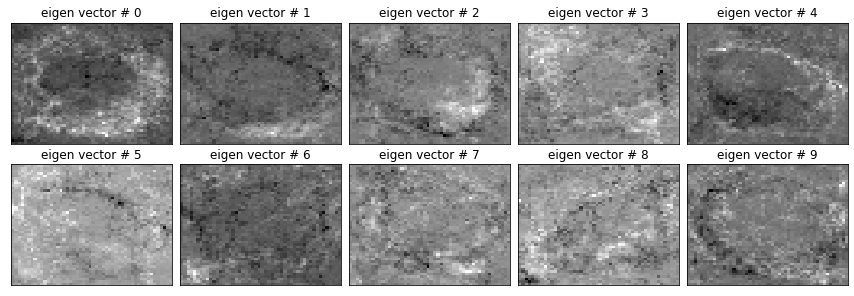

In [152]:
fig, axes = plt.subplots(2,5,figsize=(15,10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(
                             left = 0.125,
                             right = 0.9,
                             bottom = 0.125,
                             top = 0.5,
                             hspace=0.1, 
                             wspace=0.05
                         ))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(gray.shape),cmap="gray")
    ax.set_title('eigen vector # %i' %i)

# look at how much variance in data do these eigen vectors explain

In [128]:
pca.explained_variance_ratio_

array([0.05260344, 0.03593899, 0.03362617, 0.03294712, 0.03185081,
       0.02915802, 0.02568283, 0.02420763, 0.02326188, 0.02298403])

Text(0, 0.5, 'explained variance')

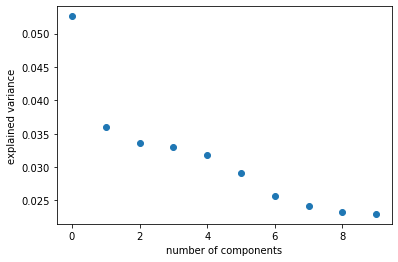

In [134]:
plt.plot(pca.explained_variance_ratio_, 'o')
plt.xlabel('number of components')
plt.ylabel('explained variance')

Text(0, 0.5, 'cumulative explained variance')

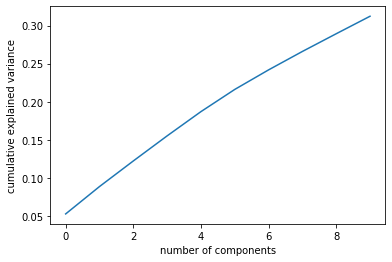

In [130]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### how much do the first two or three PCA describe the 4 groups of data

In [186]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'data across first three compoenents')

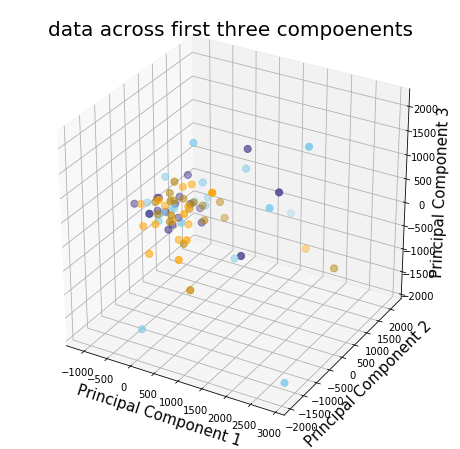

In [197]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d') 



colordict = dict(zip(['L0.1_first', 'L50_first', 'L0.1_last', 'L50_last'], 
                     ['skyblue', 'orange', 'darkslateblue', 'darkgoldenrod']))  

projected_df["Color"] = projected_df["label"].apply(lambda x: colordict[x])

ax.scatter(xs = projected_df.loc[:,0]
               , ys = projected_df.loc[:,1]
               , zs = projected_df.loc[:,2]
               , zdir = 'z'
               , c = projected_df.Color
               , s = 50
              )

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('data across first three compoenents', fontsize = 20)

## do PCA separately for the four treatments

In [14]:
data_df = all_hist_vectors.copy()
data_df['fullname'] = all_hist_vectors.index
data_df[['lightLevel', 'flower' , 'mothID', 'visit']] = data_df['fullname'].str.split('_', 3, expand = True)
data_df['label'] = data_df['lightLevel'] + '_' + data_df['visit']
data_df = data_df.drop(columns = ['fullname', 'flower', 'mothID'])
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,62489,62490,62491,62492,62493,62494,62495,lightLevel,visit,label
,,,,,,,,,,,,,,,,,,,,,
L0.1_c-3_m20_first,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,L0.1,first,L0.1_first
L0.1_c-3_m20_last,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,L0.1,last,L0.1_last
L0.1_c-3_m21_first,80,80,80,80,80,80,30,30,30,30,...,30,30,30,30,30,30,30,L0.1,first,L0.1_first
L0.1_c-3_m21_last,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,L0.1,last,L0.1_last
L0.1_c-3_m22_first,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,L0.1,first,L0.1_first


In [16]:
v0 = []
v1 = []
for v, sub in data_df.groupby('visit'):
    for l, subsub in sub.groupby('lightLevel'):
        subset = subsub.drop(columns = ['lightLevel', 'visit', 'label'])
        pca = PCA(n_components=2)
        projected = pca.fit_transform(subset)
        
        v0.append(pca.components_[0])
        v1.append(pca.components_[1])
        print('%s and %s' %(v, l))
        print(pca.explained_variance_ratio_)

first and L0.1
[0.11171512 0.09616555]
first and L50
[0.10605741 0.09447098]
last and L0.1
[0.11024985 0.10534943]
last and L50
[0.13837122 0.0907772 ]


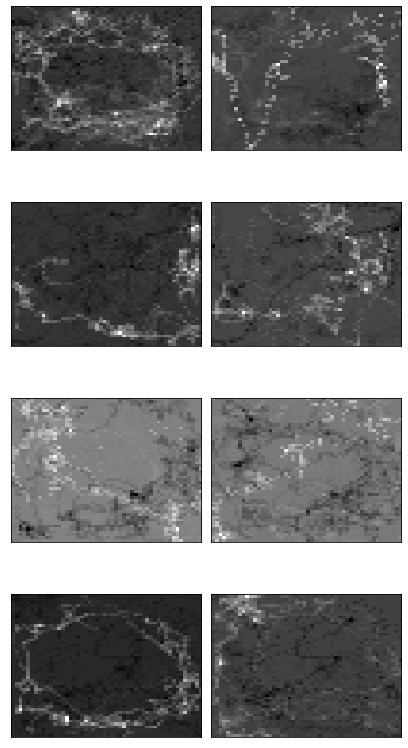

In [64]:
fig, axes = plt.subplots(4,2,figsize=(7,7*2),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(
                             left = 0.125,
                             right = 0.9,
                             bottom = 0.125,
                             top = 0.9,
                             hspace=0.01, 
                             wspace=0.05
                         )
                        )
for idx in np.arange(4):
    axes[idx, 0].imshow(v0[idx].reshape(image_shape),cmap="gray")
    axes[idx, 1].imshow(v1[idx].reshape(image_shape),cmap="gray")
    
#     ax.set_title('eigen vector # %i' %i)

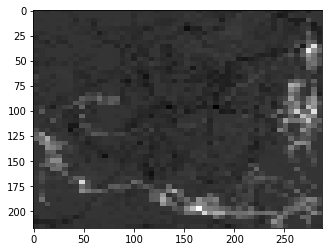

In [47]:
plt.imshow(v0[1].reshape(image_shape), cmap='gray')

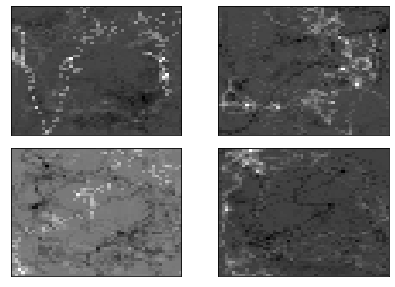

In [35]:
fig, axes = plt.subplots(2,2,figsize=(15,10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(
                             left = 0.125,
                             right = 0.5,
                             bottom = 0.125,
                             top = 0.5,
                             hspace=0.1, 
                             wspace=0.05
                         ))
for i, ax in enumerate(axes.flat):
    ax.imshow(v1[i].reshape(image_shape),cmap="gray")
#     ax.set_title('eigen vector # %i' %i)